# Reliability Analysis

## Awareness
1. Awareness of reliability concepts and applications.
2. Understanding reliability concepts, methods, and applications.

Reliability is the probability of an item performing its intended function **without failure** for a specified period of time. Its key concepts:
+ Probability: the likelihood of success.
+ Function: to cut, heat, or rotate.
+ Satisfactory: meet specifications with acceptable compliance.
+ Specific period: minutes, days, months, or cycle.
+ Specific condition: temperature, speed, or pressure.

Source: [What is Reliability?](https://asq.org/quality-resources/reliability)

**Failure rate**: the number of times of an item fails in a specified period of time.
$$ \lambda = \frac{Number\ of\ Failures}{Total\ Period\ of\ Time} $$

**Time to Failure (TTF)**: the duration until an item to fail.
$$ TTF = Total\ Durations\ of\ Operation $$

**Mean Time to Failure (MTTF)**: the average time for an item to fail.
$$ MTTF = \frac{Total\ Durations\ of\ Operation}{Total\ Numbers\ of\ Time} $$

**Mean Time to Repair (MTTR)**: the average time required to repair.
$$ MTTR = \frac{Total\ Durations\ of\ Maintenance}{Total\ Numbers\ of\ Repairs} $$

Source: [MTBF and Product Reliability](https://ftp.automationdirect.com/pub/Product%20Reliability%20and%20MTBF.pdf)

## Knowledge
1. Apply reliability methods effectively.
2. Understand basic reliability analysis methods.
3. Able to use reliability software or packages for implementing reliability models.

# Device Failure
A company wants to create a predictive maintenance solution to identify when its devices need maintenance. This approach promises cost savings over routine or time based preventive maintenance, because tasks are performed only when warranted.

Source: [Predictive Maintenance Dataset](https://www.kaggle.com/datasets/hiimanshuagarwal/predictive-maintenance-dataset/data)

## Data Overview

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/predictive_maintenance_dataset.csv")
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [3]:
df.tail()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,11/2/2015,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,70000


What type of data that is stored?

In [4]:
df.dtypes

date       object
device     object
failure     int64
metric1     int64
metric2     int64
metric3     int64
metric4     int64
metric5     int64
metric6     int64
metric7     int64
metric8     int64
metric9     int64
dtype: object

Date stored as object type. Let set the date column into datetime type.

In [5]:
df["date"] = pd.to_datetime(df["date"])

Display table for Device S1F01085.

In [6]:
df[df["device"] == "S1F01085"].head(7)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1163,2015-01-02,S1F01085,0,1650864,56,0,52,6,407438,0,0,7
2326,2015-01-03,S1F01085,0,124017368,56,0,52,6,407438,0,0,7
3489,2015-01-04,S1F01085,0,128073224,56,0,52,6,407439,0,0,7
4651,2015-01-05,S1F01085,0,97393448,56,0,52,6,408114,0,0,7
5812,2015-01-06,S1F01085,0,128832128,56,0,52,6,409404,0,0,7


How many devices are there?

In [7]:
total_devices = df["device"].nunique()
print(f"There are {total_devices} total devices")

There are 1169 total devices


What is the duration of the dataset?

In [8]:
display(df["date"].describe())
print("It seems this dataset have daily frequency.")

count                           124494
mean     2015-04-16 05:20:49.737337088
min                2015-01-01 00:00:00
25%                2015-02-09 00:00:00
50%                2015-03-27 00:00:00
75%                2015-06-17 00:00:00
max                2015-11-02 00:00:00
Name: date, dtype: object

It seems this dataset have daily frequency.


Are there any missing values?

In [9]:
display(df.isnull().sum())
print(f"There are {df.isnull().sum().sum()} missing values.")

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

There are 0 missing values.


Are there any missing date?

In [10]:
missing_dates = pd.date_range(start="2015-01-01 00:00:00", end="2015-11-02 00:00:00", freq="d").difference(df["date"])
print(f"There are {len(missing_dates)} missing dates in dataset. \n{missing_dates} ")

There are 2 missing dates in dataset. 
DatetimeIndex(['2015-10-28', '2015-11-01'], dtype='datetime64[ns]', freq=None) 


Are there any duplicates? One device should have unique timestamp.

In [11]:
total_duplicates = df.duplicated(subset=["date", "device"], keep=False).sum()
print(f"There are {total_duplicates} duplicates in dataset.")

if total_duplicates > 0:
    display(df[df.duplicated(subset=["date", "device"], keep=False)])
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)
    print("Done drop duplicates.")

There are 2 duplicates in dataset.


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
101334,2015-07-10,S1F0R4Q8,0,192721392,0,0,0,8,213700,0,0,0
101335,2015-07-10,S1F0R4Q8,0,192721392,0,0,0,8,213700,0,0,0


Done drop duplicates.


## EDA

Creating feature based on date.

In [12]:
df.sort_values(by=["device", "date"], inplace=True)
df["month"] = df["date"].dt.month
df["week_day"] = df.date.dt.weekday
df["week_day"].replace(0, 7, inplace=True)
# df["activedays"] = df.date - df.date[0]

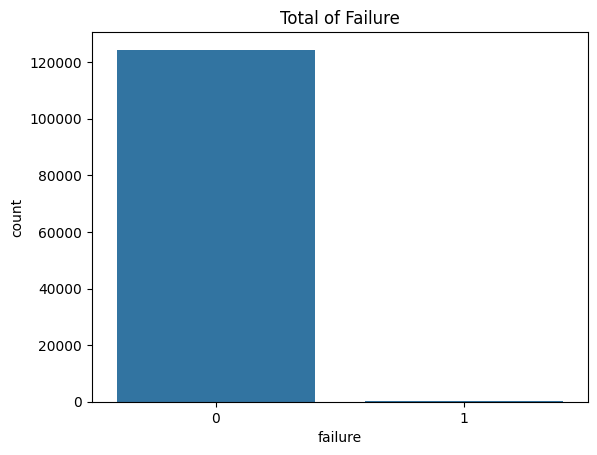

failure
0    124387
1       106
Name: count, dtype: int64

In [13]:
sns.countplot(x="failure", data=df)
plt.title("Total of Failure")
plt.show()

df["failure"].value_counts()

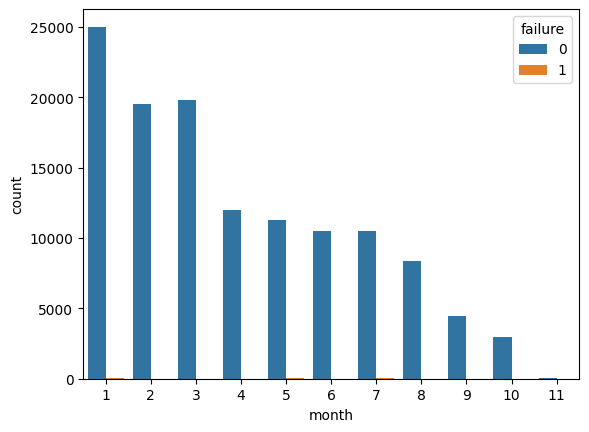

In [14]:
sns.countplot(x="month", hue="failure", data=df)
plt.show()

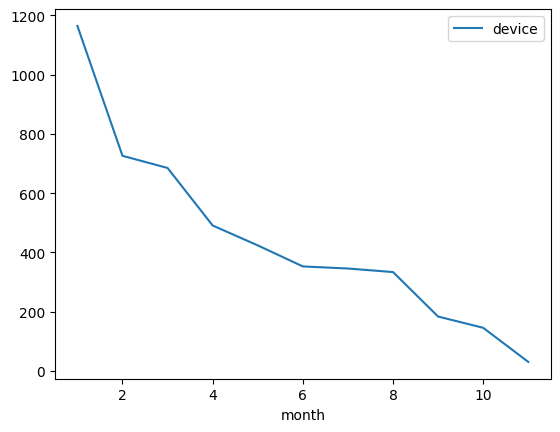

In [15]:
df.groupby("month").agg({"device":lambda x: x.nunique()}).plot()
plt.show()

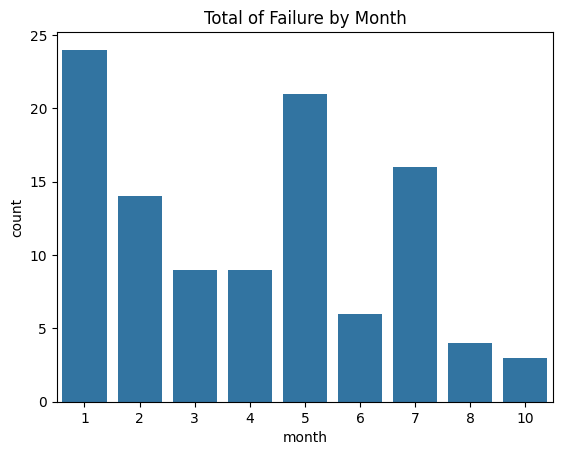

In [16]:
sns.countplot(x="month", data=df[df["failure"] == 1])
plt.title("Total of Failure by Month")
plt.show()